# **Course 3 Automatidata project**
**Course 3 - Go Beyond the Numbers: Translate Data into Insights**

You are the newest data professional in a fictional data consulting firm: Automatidata. The team is still early into the project, having only just completed an initial plan of action and some early Python coding work. 

Luana Rodriquez, the senior data analyst at Automatidata, is pleased with the work you have already completed and requests your assistance with some EDA and data visualization work for the New York City Taxi and Limousine Commission project (New York City TLC) to get a general understanding of what taxi ridership looks like. The management team is asking for a Python notebook showing data structuring and cleaning, as well as any matplotlib/seaborn visualizations plotted to help understand the data. At the very least, include a box plot of the ride durations and some time series plots, like a breakdown by quarter or month. 

Additionally, the management team has recently asked all EDA to include Tableau visualizations. For this taxi data, create a Tableau dashboard showing a New York City map of taxi/limo trips by month. Make sure it is easy to understand to someone who isn’t data savvy, and remember that the assistant director at the New York City TLC is a person with visual impairments.

A notebook was structured and prepared to help you in this project. Please complete the following questions.

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [33]:
taxi_data = pd.read_csv('C2_2017_Yellow_Taxi_Trip_Data.csv')

In [12]:
taxi_data.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


In [14]:
taxi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

In [16]:
taxi_data.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


In [19]:
taxi_data.size

408582

<Axes: title={'center': 'trip distance'}, xlabel='trip_distance'>

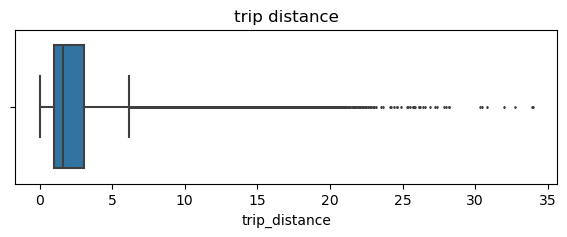

In [51]:
# Create box plot of trip_distance
taxi_data['tpep_pickup_datetime'] = pd.to_datetime(taxi_data['tpep_pickup_datetime'])
plt.figure(figsize=(7,2))
plt.title('trip distance')
sns.boxplot(data=None,x=taxi_data['trip_distance'],fliersize =1)

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='trip_distance', ylabel='Count'>

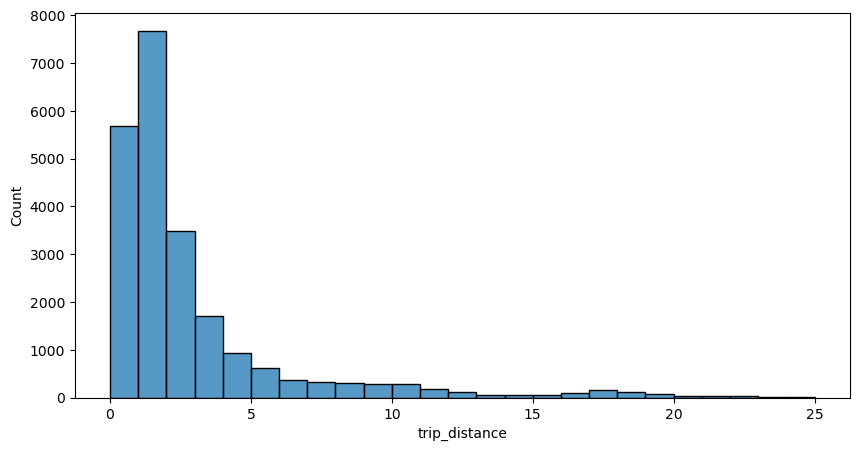

In [73]:
# Create histogram of trip_distance
plt.figure(figsize=(10,5))
sns.histplot(x=taxi_data['trip_distance'],bins=range(0,26,1))

<Axes: title={'center': 'total amount'}, xlabel='total_amount'>

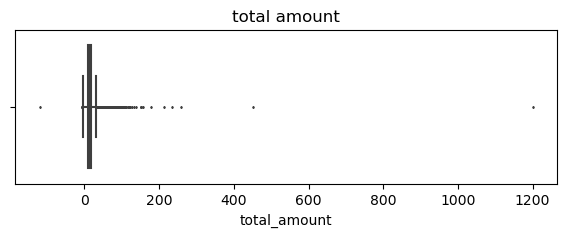

In [70]:
# Create box plot of total_amount
plt.figure(figsize=(7,2))
plt.title('total amount')
sns.boxplot(data=None,x=taxi_data['total_amount'],fliersize=1)

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: title={'center': 'Total Amount Histogram'}, xlabel='total_amount', ylabel='Count'>

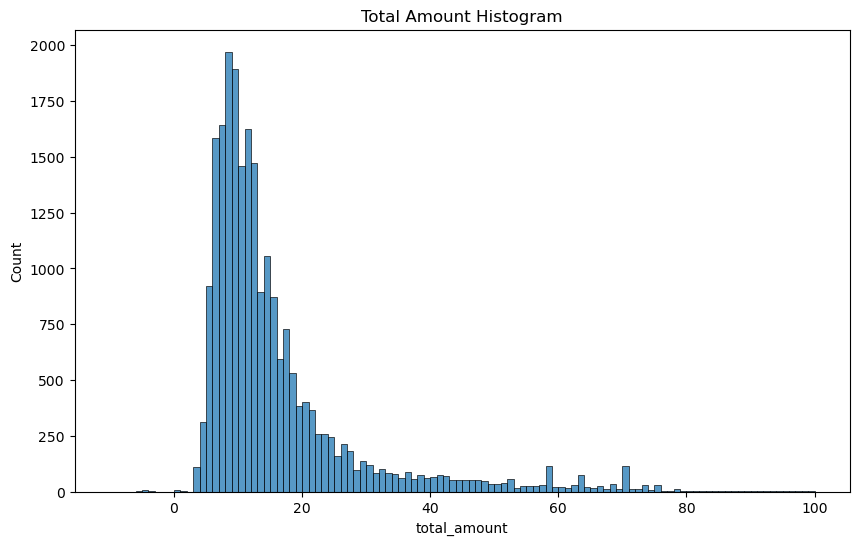

In [67]:
# Create histogram of total_amount
plt.figure(figsize=(10,6))
plt.title('Total Amount Histogram')
sns.histplot(x=taxi_data['total_amount'],bins=range(-10,101,1))

<Axes: title={'center': 'Tip amount'}, xlabel='tip_amount'>

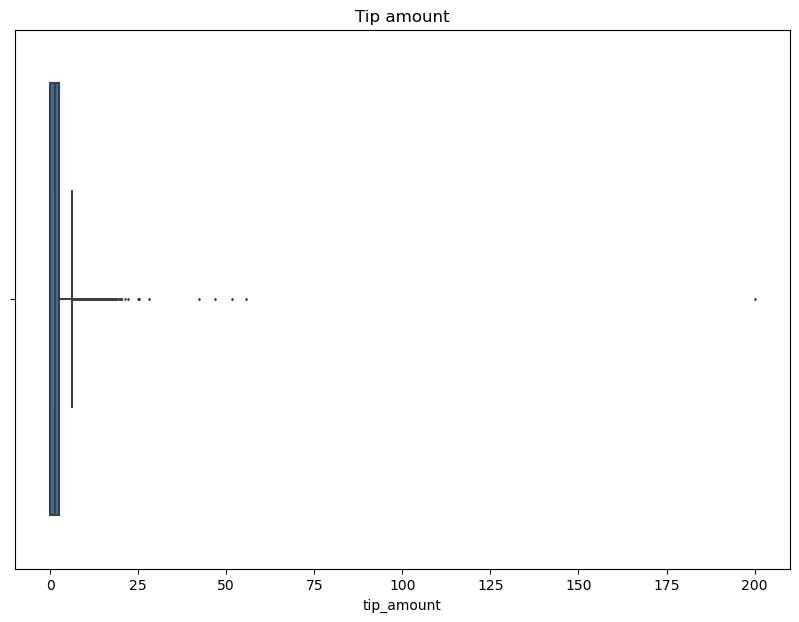

In [64]:
# Create box plot of tip_amount
plt.figure(figsize=(10,7))
plt.title('Tip amount')
sns.boxplot(data=None,x=taxi_data['tip_amount'],fliersize=1)

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: title={'center': 'Tip Amount Histogram '}, xlabel='tip_amount', ylabel='Count'>

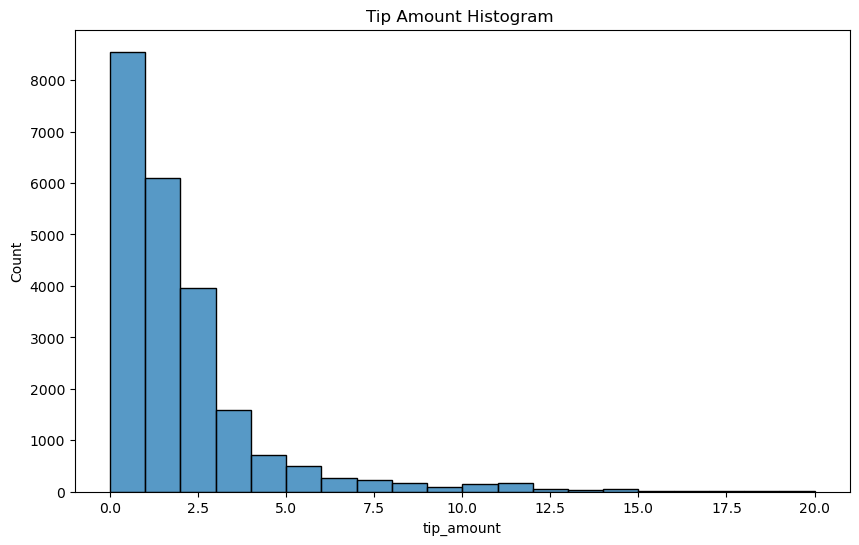

In [84]:
# Crate a histogram of tip amount
plt.figure(figsize=(10,6))
plt.title('Tip Amount Histogram ')
sns.histplot(x=taxi_data['tip_amount'],bins=range(0,21,1))

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: title={'center': 'Tip Amount Histogram by vendor'}, xlabel='tip_amount', ylabel='Count'>

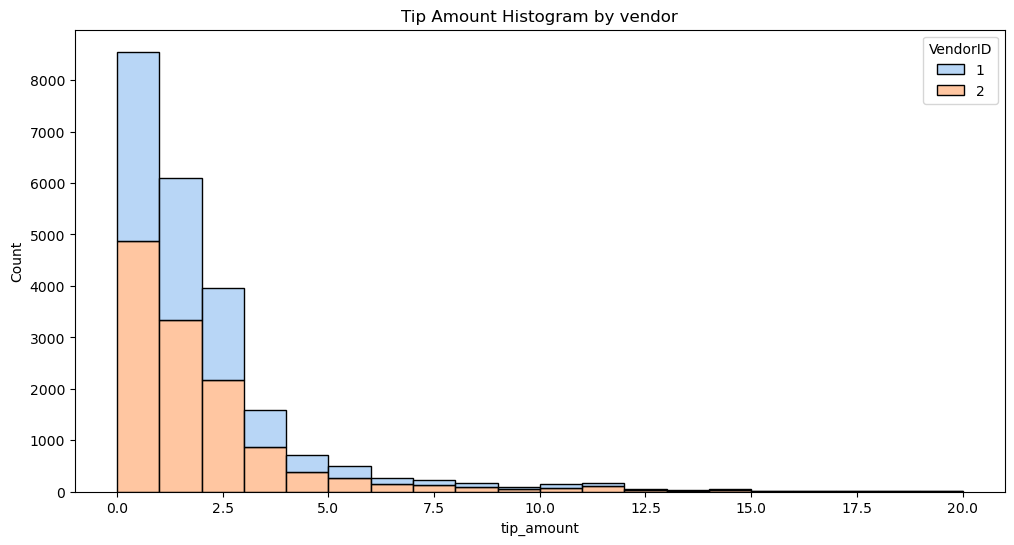

In [106]:
# Create histogram of tip_amount by vendor
plt.figure(figsize=(12,6))
plt.title('Tip Amount Histogram by vendor')
sns.histplot(data=taxi_data,x='tip_amount',bins=range(0,21,1),hue='VendorID',multiple='stack',palette='pastel')

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: title={'center': 'Tip amount histogram by vendor for tips > 10'}, xlabel='tip_amount', ylabel='Count'>

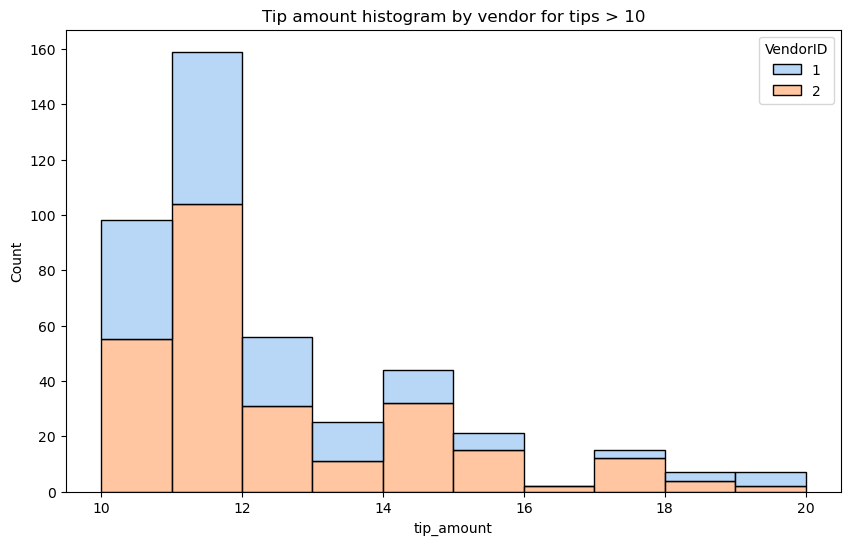

In [122]:
# Create histogram of tip_amount by vendor for tips > $10
plt.figure(figsize=(10,6))
plt.title('Tip amount histogram by vendor for tips > 10')
sns.histplot(data=taxi_data[taxi_data['tip_amount'] > 10],x='tip_amount',bins=range(10,21,1),hue='VendorID',multiple='stack',palette='pastel')

In [126]:
taxi_data['passenger_count'].value_counts()

passenger_count
1    16117
2     3305
5     1143
3      953
6      693
4      455
0       33
Name: count, dtype: int64

In [53]:
import pandas as pd
# Create a month column
taxi_data['month'] = taxi_data['tpep_pickup_datetime'].dt.month_name()

In [55]:
# Create a day column
taxi_data['day'] = taxi_data['tpep_pickup_datetime'].dt.day_name()

In [57]:
taxi_data

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,day
0,24870114,2,2017-03-25 08:55:43,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.00,0.3,16.56,March,Saturday
1,35634249,1,2017-04-11 14:53:28,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.00,0.3,20.80,April,Tuesday
2,106203690,1,2017-12-15 07:26:56,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.00,0.3,8.75,December,Friday
3,38942136,2,2017-05-07 13:17:59,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.00,0.3,27.69,May,Sunday
4,30841670,2,2017-04-15 23:32:20,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.00,0.3,17.80,April,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22694,14873857,2,2017-02-24 17:37:23,02/24/2017 5:40:39 PM,3,0.61,1,N,48,186,2,4.0,1.0,0.5,0.00,0.00,0.3,5.80,February,Friday
22695,66632549,2,2017-08-06 16:43:59,08/06/2017 5:24:47 PM,1,16.71,2,N,132,164,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20,August,Sunday
22696,74239933,2,2017-09-04 14:54:14,09/04/2017 2:58:22 PM,1,0.42,1,N,107,234,2,4.5,0.0,0.5,0.00,0.00,0.3,5.30,September,Monday
22697,60217333,2,2017-07-15 12:56:30,07/15/2017 1:08:26 PM,1,2.36,1,N,68,144,1,10.5,0.0,0.5,1.70,0.00,0.3,13.00,July,Saturday


In [59]:
# Get total number of rides for each month
total_rides = taxi_data['month'].value_counts()
total_rides

month
March        2049
October      2027
April        2019
May          2013
January      1997
June         1964
December     1863
November     1843
February     1769
September    1734
August       1724
July         1697
Name: count, dtype: int64

In [71]:
month_order = ['January','February','March','April','May','June','July','August','September','October','November','December']
total_rides = total_rides.reindex(index=month_order)
total_rides

month
January      1997
February     1769
March        2049
April        2019
May          2013
June         1964
July         1697
August       1724
September    1734
October      2027
November     1843
December     1863
Name: count, dtype: int64

<Axes: title={'center': 'Total rides bar plot per month'}, xlabel='month', ylabel='count'>

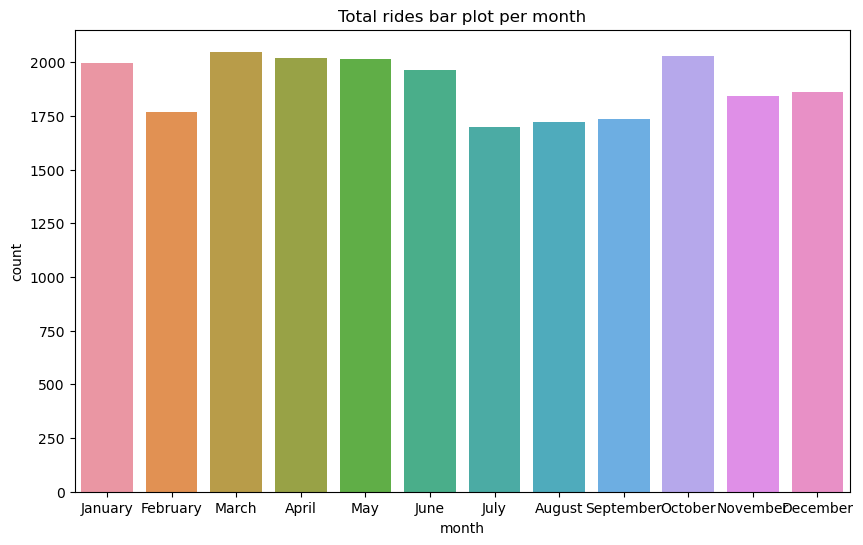

In [77]:
# Create a bar plot of total rides per month
plt.figure(figsize=(10,6))
plt.title('Total rides bar plot per month')
sns.barplot(x=total_rides.index,y=total_rides)

In [91]:
# Repeat the above process, this time for rides by day
day_rides = taxi_data['day'].value_counts()

In [93]:
day_rides

day
Friday       3413
Thursday     3402
Wednesday    3390
Saturday     3367
Tuesday      3198
Sunday       2998
Monday       2931
Name: count, dtype: int64

In [95]:
day_order = ['Saturday','Sunday','Monday','Tuesday','Wednesday','Thursday','Friday']
day_rides = day_rides.reindex(index=day_order)
day_rides

day
Saturday     3367
Sunday       2998
Monday       2931
Tuesday      3198
Wednesday    3390
Thursday     3402
Friday       3413
Name: count, dtype: int64

<Axes: title={'center': 'Total rides bar plot by per day'}, xlabel='day', ylabel='count'>

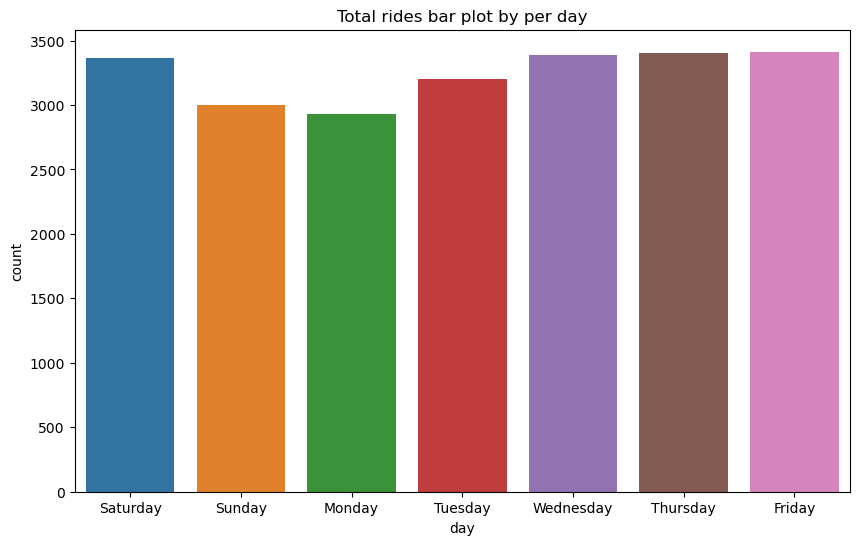

In [221]:
plt.figure(figsize=(10,6))
plt.title('Total rides bar plot by per day')
sns.barplot(x=day_rides.index,y=day_rides)

In [131]:
# Repeat the process, this time for total revenue by day
total_revenue = taxi_data.groupby('day')['total_amount'].sum()
total_revenue = total_revenue.reindex(index=day_order)
print(total_revenue)

day
Saturday     51195.40
Sunday       48624.06
Monday       49574.37
Tuesday      52527.14
Wednesday    55310.47
Thursday     57181.91
Friday       55818.74
Name: total_amount, dtype: float64


Text(0, 0.5, 'Revenue')

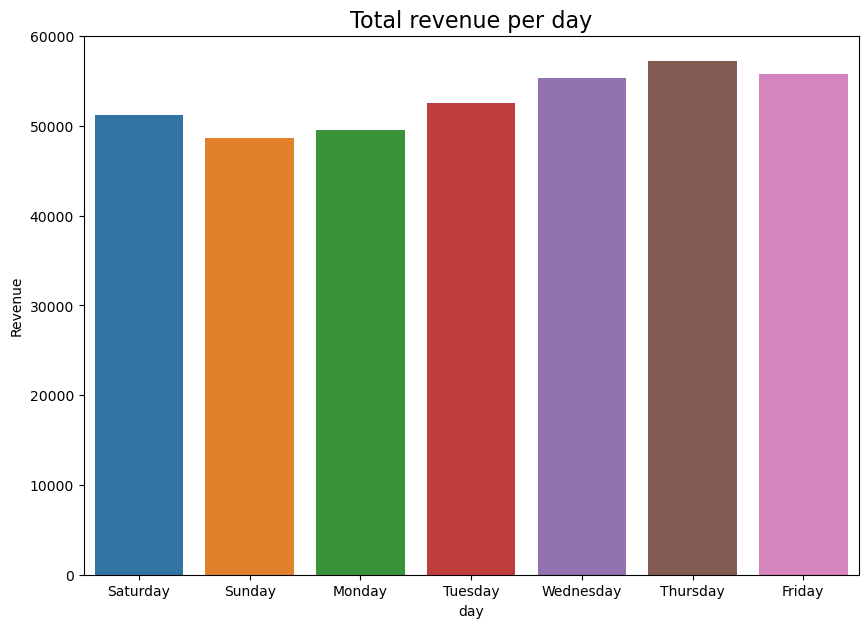

In [223]:
plt.figure(figsize=(10,7))
plt.title('Total revenue per day',fontsize=16)
ax=sns.barplot(x=total_revenue.index,y=total_revenue)
ax.set_xticklabels(day_order)
ax.set_ylabel('Revenue')


In [159]:
# Repeat the process, this time for total revenue by month
revenue_month =taxi_data.groupby('month')['total_amount'].sum()
revenue_month = revenue_month.reindex(index=month_order)
print(revenue_month)

month
January      31735.25
February     28937.89
March        33085.89
April        32012.54
May          33828.58
June         32920.52
July         26617.64
August       27759.56
September    28206.38
October      33065.83
November     30800.44
December     31261.57
Name: total_amount, dtype: float64


<Axes: title={'center': 'Revenue per month'}, xlabel='month', ylabel='total_amount'>

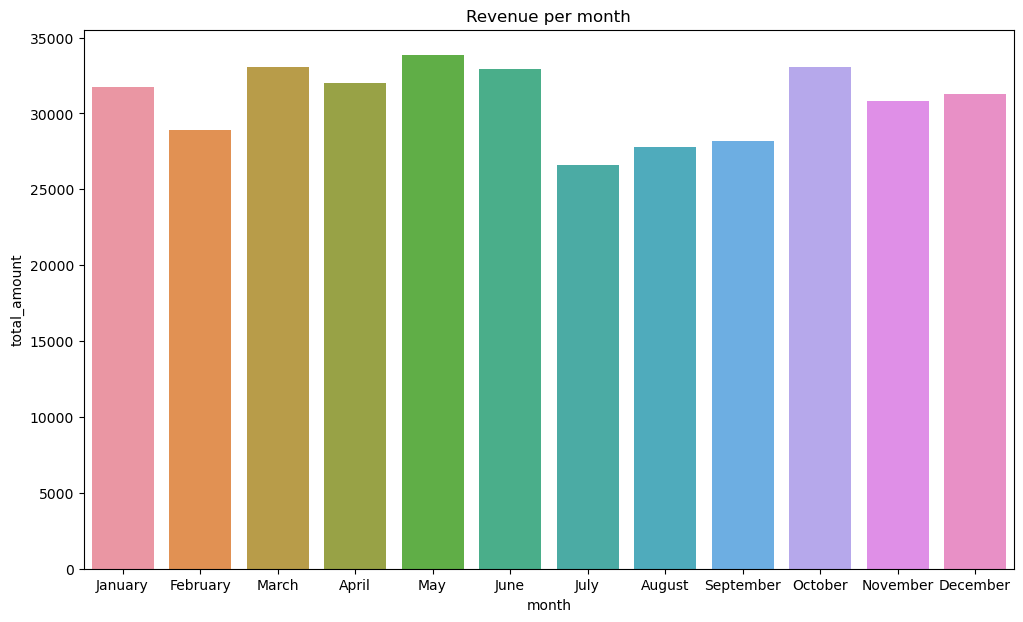

In [225]:
plt.figure(figsize=(12,7))
plt.title('Revenue per month')
sns.barplot(x=revenue_month.index,y=revenue_month)

In [169]:
# Get number of unique drop-off location IDs
taxi_data['DOLocationID'].nunique()

216

In [210]:
# Calculate the mean trip distance for each drop-off location
distance = taxi_data.groupby('DOLocationID')['trip_distance'].mean()
distance = distance.sort_values()
print(distance)

DOLocationID
207     1.200000
193     1.390556
237     1.555494
234     1.727806
137     1.818852
         ...    
51     17.310000
11     17.945000
210    20.500000
29     21.650000
23     24.275000
Name: trip_distance, Length: 216, dtype: float64


<Axes: title={'center': 'Average trip distance '}, xlabel='DOLocationID', ylabel='trip_distance'>

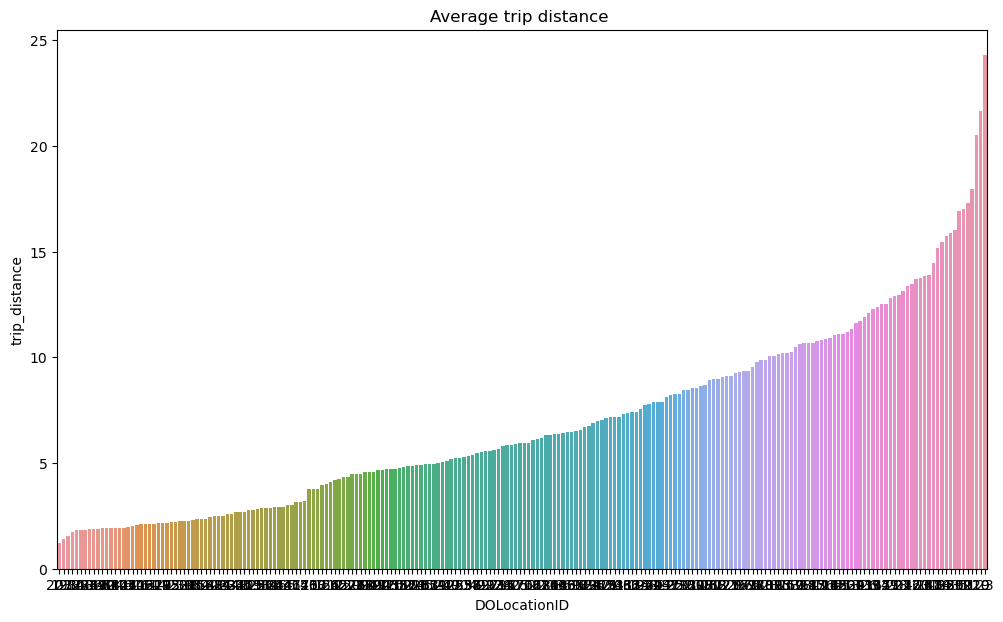

In [227]:
# Create a bar plot of mean trip distances by drop-off location in ascending order by distance
plt.figure(figsize=(12,7))
plt.title('Average trip distance ')
sns.barplot(x=distance.index,y=distance,order=distance.index)

I have learned .... the highest distribution of trip distances are below 5 miles, but there are outliers all the way out to 35 miles. There are no missing values.

My other questions are .... There are several trips that have a trip distance of "0.0." What might those trips be? Will they impact our model?

My client would likely want to know ... that the data includes dropoff and pickup times. We can use that information to derive a trip duration for each line of data. This would likely be something that will help the client with their model.
